In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read in the two files (WardIcome.csv & _311requests.csv)

df_one = pd.read_csv('WardIncome.csv')
df_two = pd.read_csv('_311requests.csv')
df_one.head()

,Ward,MedianHHincome,MeanHHincome
0,Ward 1,82159,106388
1,Ward 2,100388,140459
2,Ward 3,112873,176921
3,Ward 4,74600,111933
4,Ward 5,57554,77329


In [3]:
#Subset the  _311requests data to create a data set of just "Parking Enforcement" related service requests (based on the SERVICECODEDESCRIPTION column)
ndf = df_two[df_two['SERVICECODEDESCRIPTION'] ==  "Parking Enforcement"]


In [4]:
#Using the subsetted 311 requests dataset, aggregate the data to get the number of these requests by Ward
ndf = ndf[['OBJECTID','WARD']].groupby('WARD').agg('count')
ndf = ndf.reset_index()
ndf.columns = ['Ward','Num Of Parking Enforcemnt Requests']

In [5]:
#Merge the ward income data set and the aggregated, subsetted 311 request data set (inner join) to create one dataset with the median income, mean income, and number of parking enforcement requests for each ward
ward_income = ndf.merge(df_one,how='inner')
ward_income.columns = ['Ward', 'Num Of Parking Enforcemnt Requests', 'Median Income', 'Mean Income'] 
ward_income

,Ward,Num Of Parking Enforcemnt Requests,Median Income,Mean Income
0,Ward 1,4282,82159,106388
1,Ward 2,5572,100388,140459
2,Ward 3,2139,112873,176921
3,Ward 4,2048,74600,111933
4,Ward 5,3599,57554,77329
5,Ward 6,6318,94343,117002
6,Ward 7,1405,39165,53093
7,Ward 8,1351,30910,44245


<AxesSubplot: title={'center': 'Median Income vs Number of Parking Enforcemnt Requests'}, xlabel='Median Income'>

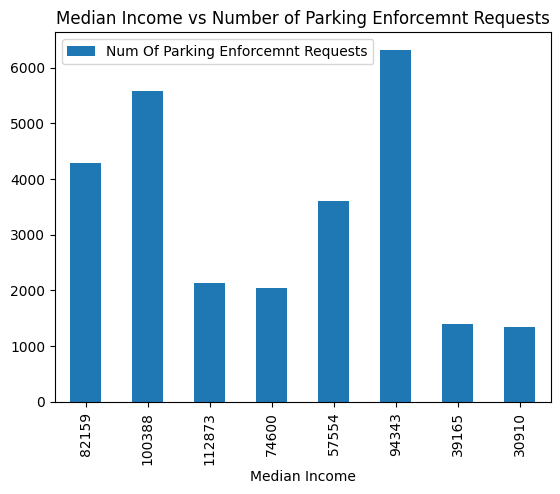

In [6]:
#Create a graph/plot to illustrate the relationship between median household income (independent variable) and number of parking enforcement requests (dependent variable).
#plt.plot(ward_income['Median Income'],ward_income['Num Of Parking Enforcemnt Requests'])

ward_income.plot.bar(x = 'Median Income', y ='Num Of Parking Enforcemnt Requests', title = 'Median Income vs Number of Parking Enforcemnt Requests')

Interpertation: It seems that wards with higher median incomes tend to have higher numbers of parking encorfemnt requests. There are some expections to this. For example, the ward with the median incomes of 112873 has a few amount of parking eforcemnt requests.

<AxesSubplot: title={'center': 'Mean Income vs Number of Parking Enforcemnt Requests'}, xlabel='Mean Income'>

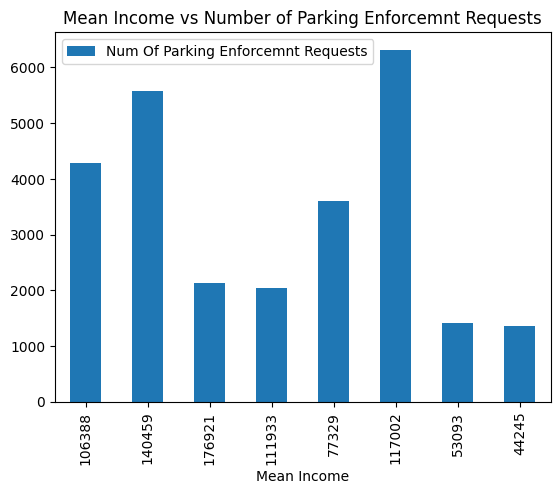

In [ ]:
#Create a graph/plot to illustrate the relationship between mean household income (independent variable) and number of parking enforcement requests (dependent variable).
ward_income.plot.bar(x = 'Mean Income', y ='Num Of Parking Enforcemnt Requests', title = 'Mean Income vs Number of Parking Enforcemnt Requests')


Interperetation: While it can be said that mean income has the same patterns as median income when it comes to the number of parking enforcemnt requests, there are also some expections to the rule. For example, while it is expected that wards with higher mean income, like the ward with mean income of $111933, it seems that there are very few requests, relativly. 